## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [1]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

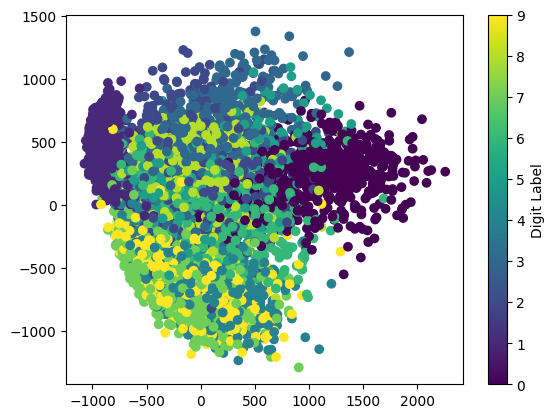

In [2]:
pca = PCA(n_components=2)
X_mnist_train_pca = pca.fit_transform(X_mnist_train)
X_mnist_test_pca = pca.fit_transform(X_mnist_test)

scatter = plt.scatter(X_mnist_train_pca[:, 0], X_mnist_train_pca[:, 1], c=y_mnist_train)
plt.colorbar(scatter, label="Digit Label")


#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

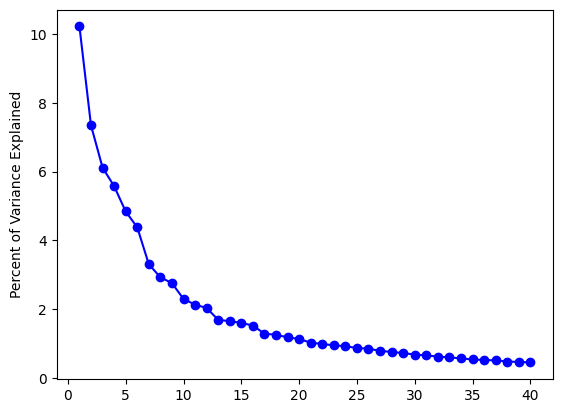

In [3]:
pca_40 = PCA(n_components=40)
pca_40.fit(X_mnist_train)

explained_variance = pca_40.explained_variance_ratio_ * 100

plt.plot(range(1, 41), explained_variance, marker="o", linestyle="-", color="b")
plt.ylabel("Percent of Variance Explained")
plt.show()

#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [4]:
pca_full = PCA(n_components=784)
pca_full.fit(X_mnist_train)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components required to explain 95% variance: {n_components_95}")

Number of components required to explain 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

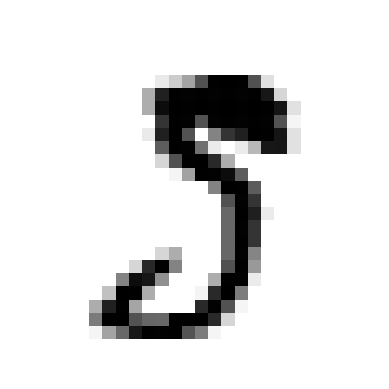

In [5]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 148.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()
    
plot_mnist_digit(X_mnist_train[0])


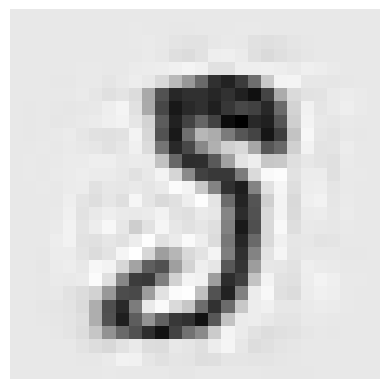

In [6]:
pca_148 = PCA(n_components=148)
X_mnist_train_pca148 = pca_148.fit_transform(X_mnist_train)

digit_reconstructed = pca_148.inverse_transform(X_mnist_train_pca148[0])

plot_mnist_digit(digit_reconstructed)

### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

#without dimensionality reduction
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
acc_knn_wo = accuracy_score(y_mnist_test, y_pred)
print(f"KNN accuracy (raw features): {acc_knn_wo:.4f}")

#with dimensionality reduction
pca_80 = PCA(0.80)
X_train_pca = pca_80.fit_transform(X_mnist_train)
X_test_pca = pca_80.transform(X_mnist_test)
knn.fit(X_train_pca, y_mnist_train)
y_pred_pca = knn.predict(X_test_pca)
acc_knn_w_pca = accuracy_score(y_mnist_test, y_pred_pca)
print(f"KNN accuracy (PCA-reduced, 80% variance): {acc_knn_w_pca:.4f}")

KNN accuracy (raw features): 0.9421
KNN accuracy (PCA-reduced, 80% variance): 0.9529


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

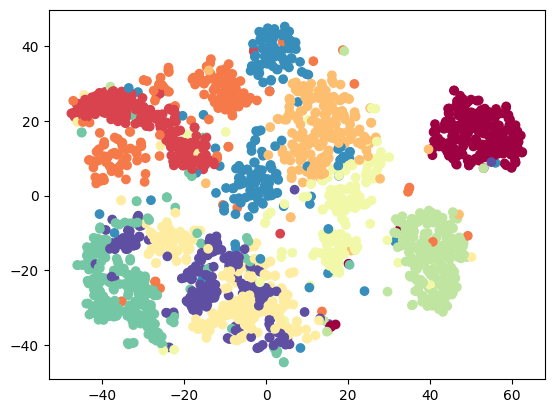

In [8]:
from sklearn.manifold import TSNE

X_subset = X_mnist_train[:2000]
y_subset = y_mnist_train[:2000]

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap=plt.cm.Spectral)

2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [9]:
X_test_subset = X_mnist_test[:500]
y_test_subset = y_mnist_test[:500]

tsne = TSNE(n_components=2, random_state=42)
X_test_tsne = tsne.fit_transform(X_test_subset)

knn_tsne = KNeighborsClassifier()
knn_tsne.fit(X_tsne, y_subset)
y_pred_tsne = knn_tsne.predict(X_test_tsne)

acc_tsne = accuracy_score(y_test_subset, y_pred_tsne)
print(f"KNN accuracy using t-SNE features: {acc_tsne:.4f}")

KNN accuracy using t-SNE features: 0.1540


`The new KNN does not preform nearly as good as some of the other methods`

## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [ ]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

#%pip install numpy==2.0
#%pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 44.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 46.0 MB/s eta 0:00:00:00:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [umap-learn]5 [numba]te]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install -

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


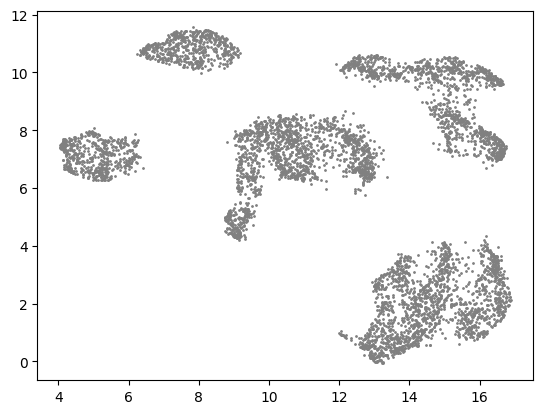

In [12]:
import umap

umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_model.fit_transform(X_mnist_train)
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=1,color='gray')

Now, calculate accuracy with KNN.

In [13]:
X_train_umap = umap_model.fit_transform(X_mnist_train)
X_test_umap = umap_model.transform(X_mnist_test)

knn_umap = KNeighborsClassifier()
knn_umap.fit(X_train_umap, y_mnist_train)
y_pred_umap = knn_umap.predict(X_test_umap)
acc_umap = accuracy_score(y_mnist_test, y_pred_umap)
print(f"KNN accuracy using UMAP embeddings (2D): {acc_umap:.4f}")


KNN accuracy using UMAP embeddings (2D): 0.8600


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


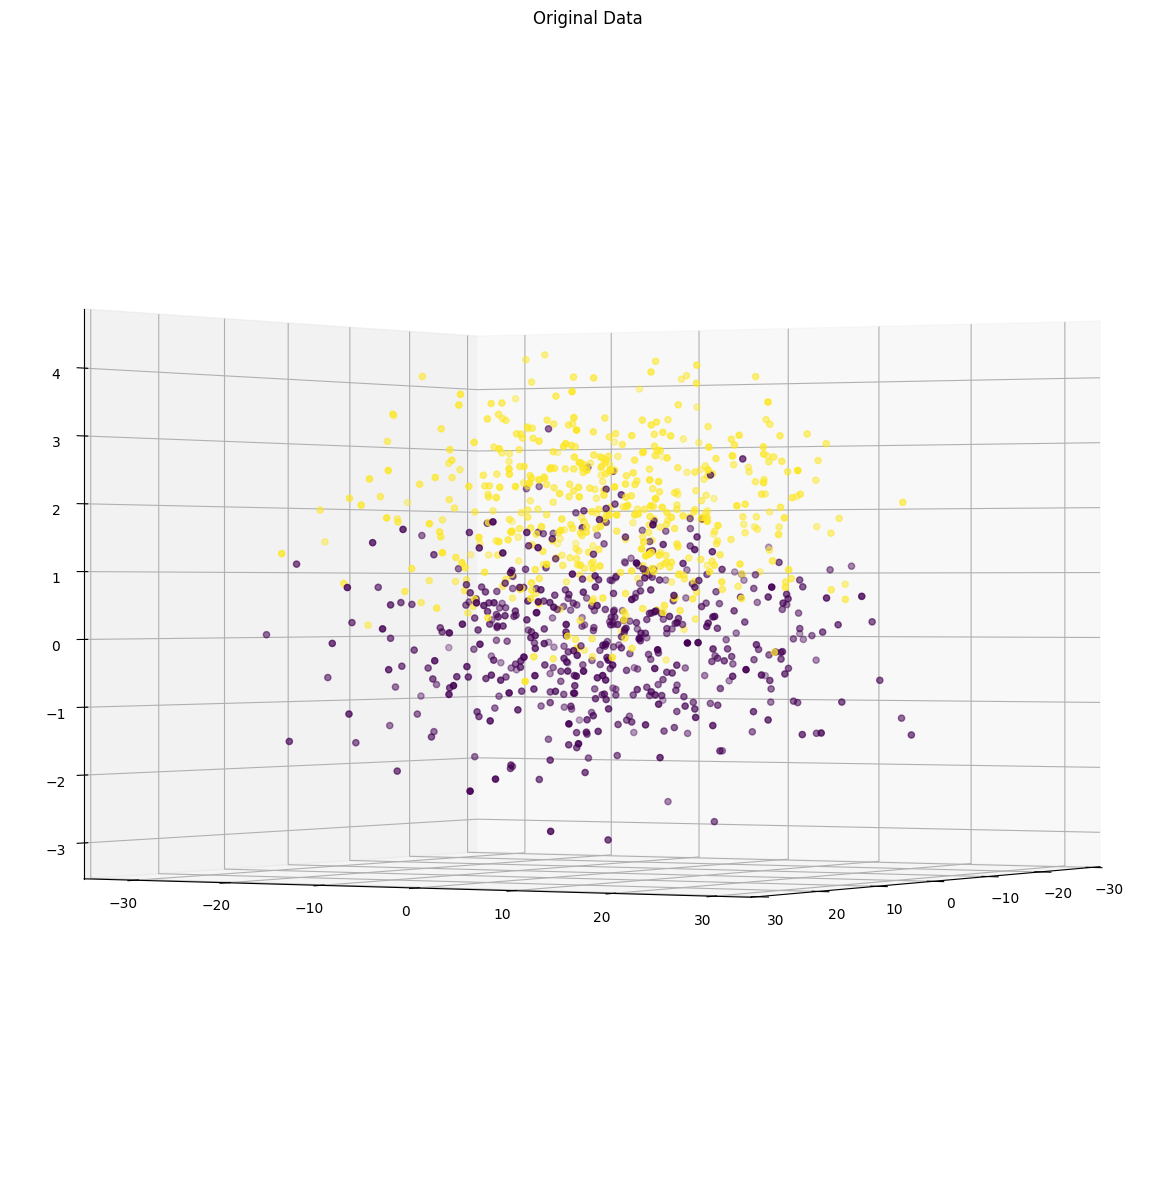

In [14]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [15]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

PCA with 1 components -> Accuracy: 0.7040


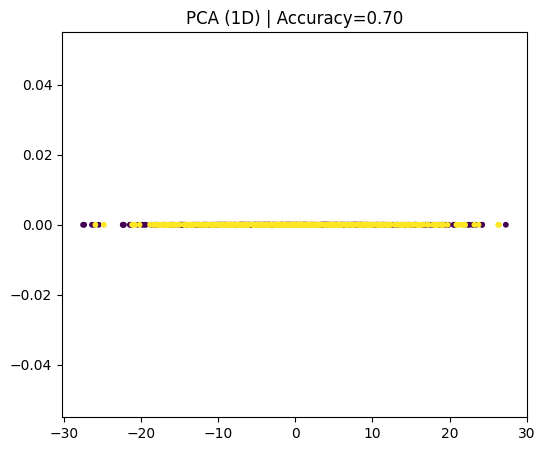

PCA with 2 components -> Accuracy: 0.6810


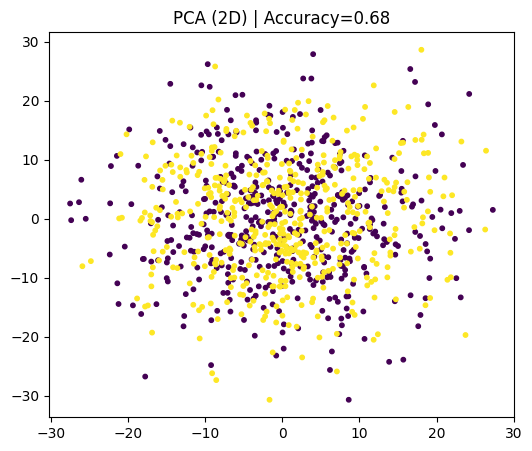

PCA with 3 components -> Accuracy: 0.8440


<Figure size 600x500 with 0 Axes>

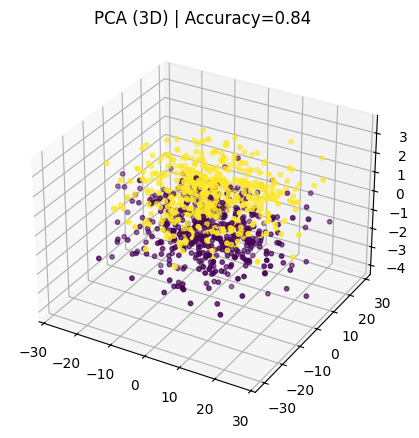

In [16]:
for n_components in [1, 2, 3]:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # Train KNN on PCA-reduced data
    knn = KNeighborsClassifier()
    knn.fit(X_pca, y)
    y_pred = knn.predict(X_pca)
    acc = accuracy_score(y, y_pred)
    
    print(f"PCA with {n_components} components -> Accuracy: {acc:.4f}")
    
    # Visualization
    plt.figure(figsize=(6, 5))
    if n_components == 1:
        # 1D scatter
        plt.scatter(X_pca, np.zeros_like(X_pca), c=y, cmap="viridis", s=10)
        plt.title(f"PCA (1D) | Accuracy={acc:.2f}")
    elif n_components == 2:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", s=10)
        plt.title(f"PCA (2D) | Accuracy={acc:.2f}")
    else:  # 3D
        fig = plt.figure(figsize=(6, 5))
        ax = fig.add_subplot(111, projection="3d")
        ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap="viridis", s=10)
        ax.set_title(f"PCA (3D) | Accuracy={acc:.2f}")
    
    plt.show()

In [20]:
components = [1, 2, 3]
accuracies = []

for n_components in components:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    knn = KNeighborsClassifier()
    knn.fit(X_pca, y)
    y_pred = knn.predict(X_pca)
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)

for c, a in zip(components, accuracies):
    print(f"PCA with {c} components -> Accuracy: {a:.4f}")

PCA with 1 components -> Accuracy: 0.7040
PCA with 2 components -> Accuracy: 0.6810
PCA with 3 components -> Accuracy: 0.8440


2. Try with UMAP.

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


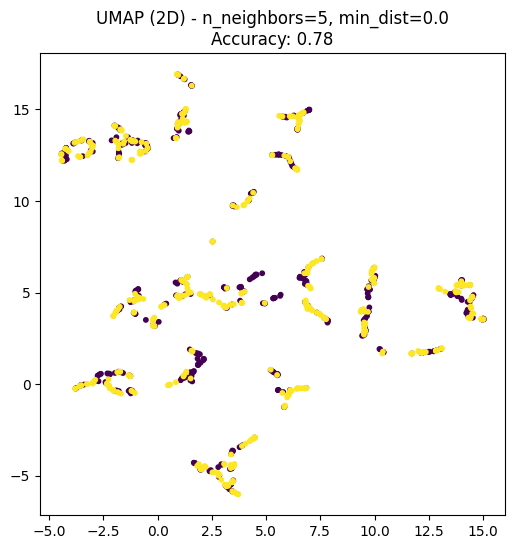

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


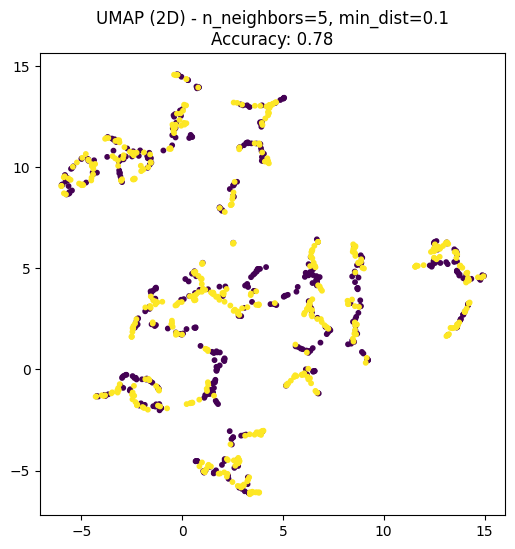

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


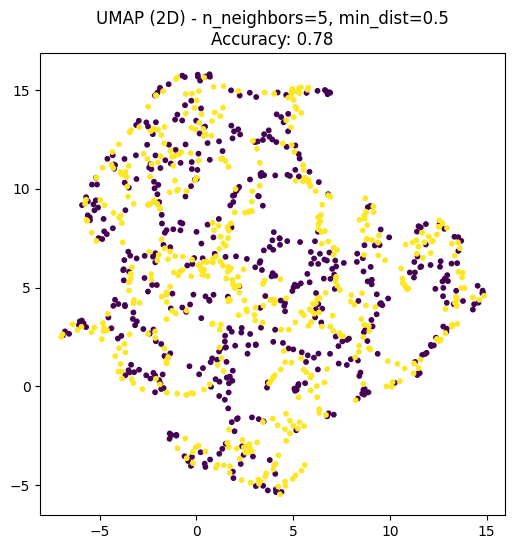

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


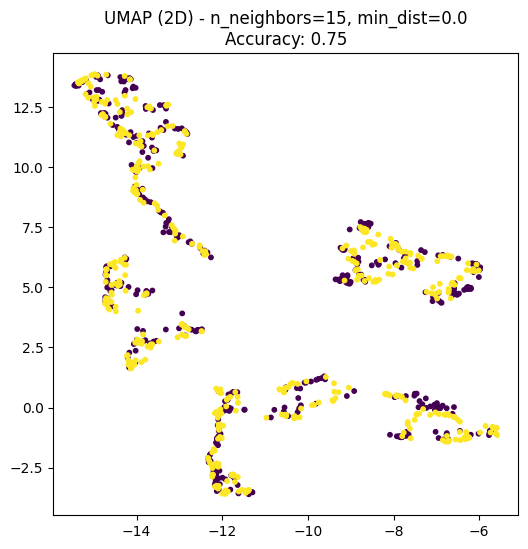

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


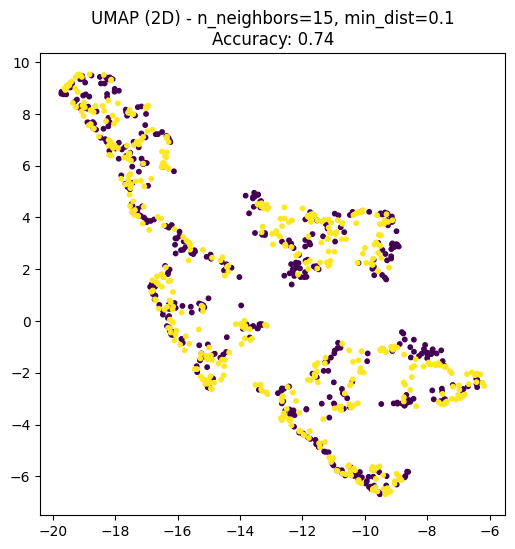

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


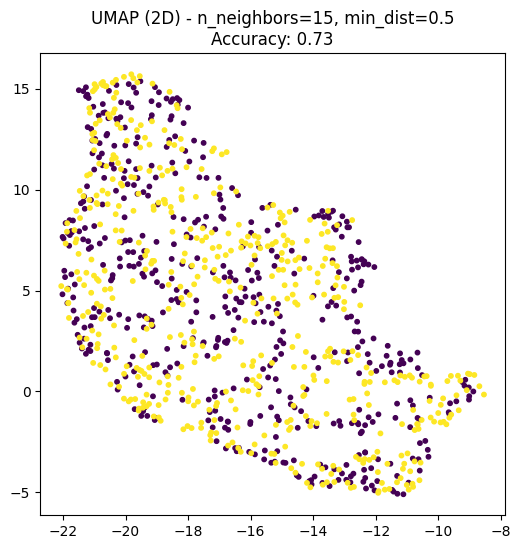

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


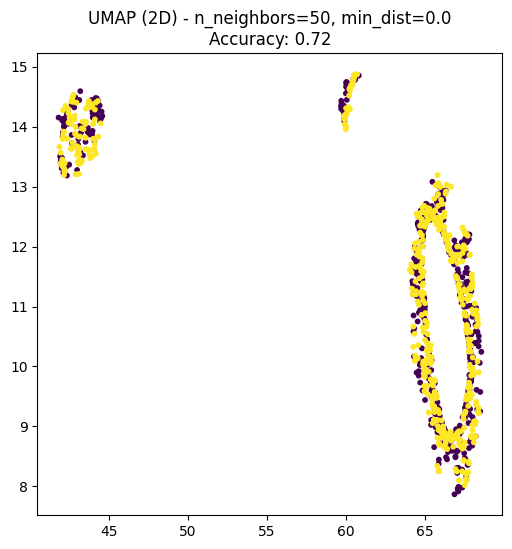

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


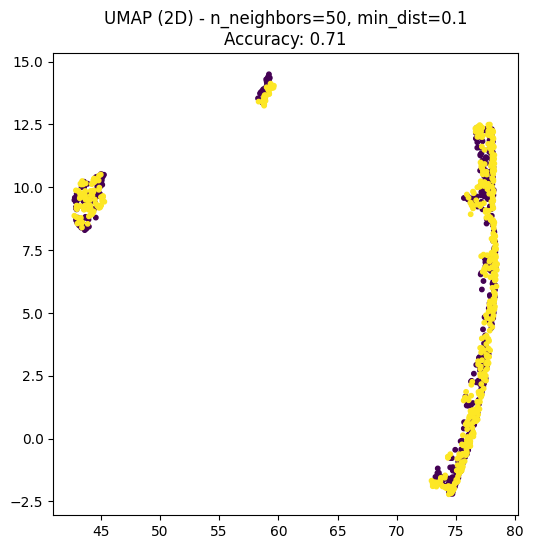

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


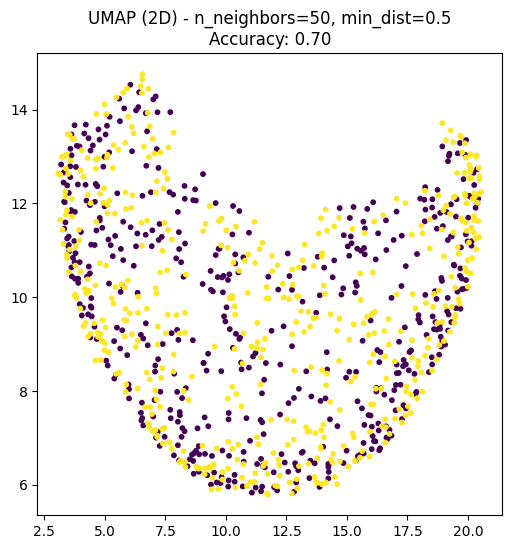

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 

In [19]:
dims = [2, 3] 
for d in dims:
    for n_neighbors in [5, 15, 50]:
        for min_dist in [0.0, 0.1, 0.5]:
            umap_model = umap.UMAP(
                n_components=d,
                n_neighbors=n_neighbors,
                min_dist=min_dist,
                random_state=42
            )
            X_umap = umap_model.fit_transform(X)

            knn_umap = KNeighborsClassifier()
            knn_umap.fit(X_umap, y)
            acc_umap = accuracy_score(y, knn_umap.predict(X_umap))

            # Visualization (2D only)
            if d == 2:
                plt.figure(figsize=(6, 6))
                plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap="viridis", s=10)
                plt.title(f"UMAP (2D) - n_neighbors={n_neighbors}, min_dist={min_dist}\nAccuracy: {acc_umap:.2f}")
                plt.show()

In [21]:
results = []

dims = [2, 3]
for d in dims:
    for n_neighbors in [5, 15, 50]:
        for min_dist in [0.0, 0.1, 0.5]:
            umap_model = umap.UMAP(
                n_components=d,
                n_neighbors=n_neighbors,
                min_dist=min_dist,
                random_state=42
            )
            X_umap = umap_model.fit_transform(X)

            knn_umap = KNeighborsClassifier()
            knn_umap.fit(X_umap, y)
            acc_umap = accuracy_score(y, knn_umap.predict(X_umap))

            results.append((d, n_neighbors, min_dist, acc_umap))

# Print neatly
print("UMAP KNN Accuracy Results:\n")
for d, n_neighbors, min_dist, acc in results:
    print(f"  Dim={d}, n_neighbors={n_neighbors}, min_dist={min_dist} -> Accuracy: {acc:.4f}")

/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 

UMAP KNN Accuracy Results:

  Dim=2, n_neighbors=5, min_dist=0.0 -> Accuracy: 0.7780
  Dim=2, n_neighbors=5, min_dist=0.1 -> Accuracy: 0.7770
  Dim=2, n_neighbors=5, min_dist=0.5 -> Accuracy: 0.7840
  Dim=2, n_neighbors=15, min_dist=0.0 -> Accuracy: 0.7520
  Dim=2, n_neighbors=15, min_dist=0.1 -> Accuracy: 0.7440
  Dim=2, n_neighbors=15, min_dist=0.5 -> Accuracy: 0.7350
  Dim=2, n_neighbors=50, min_dist=0.0 -> Accuracy: 0.7220
  Dim=2, n_neighbors=50, min_dist=0.1 -> Accuracy: 0.7080
  Dim=2, n_neighbors=50, min_dist=0.5 -> Accuracy: 0.7030
  Dim=3, n_neighbors=5, min_dist=0.0 -> Accuracy: 0.7850
  Dim=3, n_neighbors=5, min_dist=0.1 -> Accuracy: 0.7870
  Dim=3, n_neighbors=5, min_dist=0.5 -> Accuracy: 0.8080
  Dim=3, n_neighbors=15, min_dist=0.0 -> Accuracy: 0.7460
  Dim=3, n_neighbors=15, min_dist=0.1 -> Accuracy: 0.7450
  Dim=3, n_neighbors=15, min_dist=0.5 -> Accuracy: 0.7390
  Dim=3, n_neighbors=50, min_dist=0.0 -> Accuracy: 0.7310
  Dim=3, n_neighbors=50, min_dist=0.1 -> Accuracy:

Explain your results in the cell below.  Which works better?  Why?

PCA with 3 dimensions as the highest accuracy and works the best (just for PCA), which makes sense because it breaks down the data and transformations into the most dimensions, causing the accuracy to increase since more can be learned from the result. KNN with 3 dimensions, 5 neighbors, and a min distance of 0.5. We can see that KNN follows the same trend as PCA with the result with the most dimentions and moving the results apart (highest min distance) having the best accuracy. Between PCA and KNN, the PCA test had the highest accurracy making it the better method for this data.